In [1]:
import pandas as pd

In [2]:
questions = pd.read_csv('./question_train_word.csv')

In [3]:
questions.shape

(2999967, 3)

In [7]:
questions.iloc[0]

id                                           6555699376639805223
title          w305,w13549,w22752,w11,w7225,w2565,w1106,w16,w...
description    w231,w54,w1681,w54,w11506,w5714,w7,w54,w744,w1...
Name: 0, dtype: object

In [8]:
questions.title[0].split(',')

['w305',
 'w13549',
 'w22752',
 'w11',
 'w7225',
 'w2565',
 'w1106',
 'w16',
 'w31389',
 'w6',
 'w1019',
 'w69288',
 'w111',
 'w3332',
 'w109',
 'w11',
 'w25',
 'w1110',
 'w111']

In [13]:
words = [w for title in questions.title if type(title) == str for w in title.split(',')]

In [14]:
print(len(words))
set_words = set(words)
print(len(set_words))

38726556
324959


In [15]:
from collections import Counter
count_words = Counter(words)

In [16]:
count_words.most_common(10)

[('w111', 2976600),
 ('w6', 1921785),
 ('w11', 1474827),
 ('w109', 552983),
 ('w54', 547054),
 ('w25', 526597),
 ('w471', 433385),
 ('w4016', 419135),
 ('w1110', 389917),
 ('w10147', 351932)]

In [19]:
import numpy as np
import matplotlib.pyplot as plt

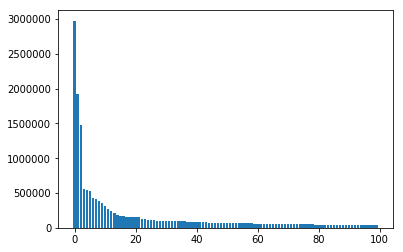

In [21]:
labels, values = zip(*count_words.most_common(100))
indexes = np.arange(len(labels))

plt.bar(indexes, values)
plt.show()

<Container object of 100 artists>

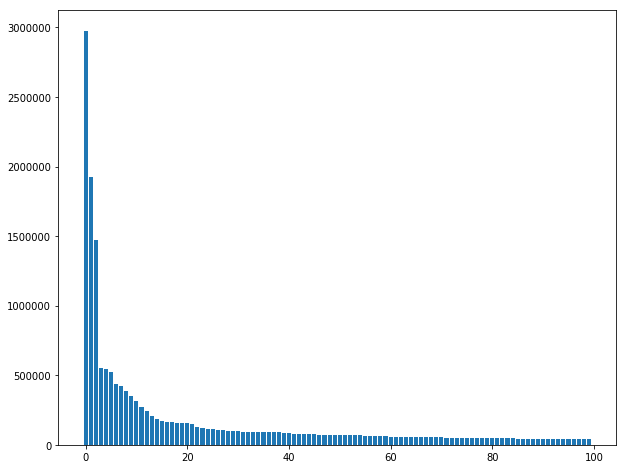

In [23]:
%matplotlib inline
figsize = (10, 8)
fig = plt.figure(figsize=figsize)
plt.bar(indexes, values)

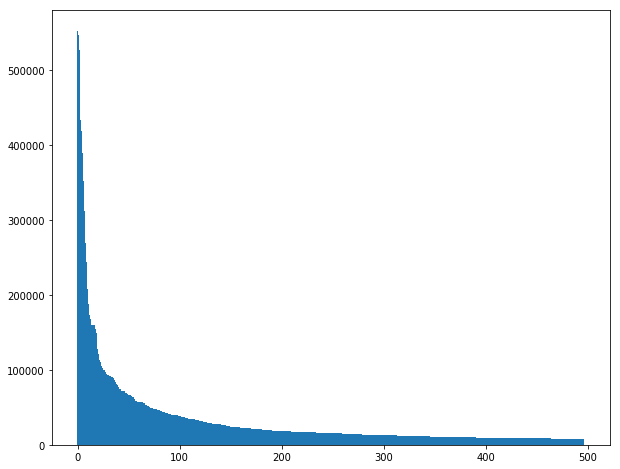

In [25]:
fig = plt.figure(figsize=figsize)
labels, values = zip(*count_words.most_common(500)[3:])
indexes = np.arange(len(labels))

plt.bar(indexes, values, width=1)
plt.show()

In [28]:
total_words = len(words)

In [33]:
%%time
word_weight = {l: np.log(total_words / v) for (l, v) in count_words.items()}

CPU times: user 554 ms, sys: 276 ms, total: 830 ms
Wall time: 927 ms


In [35]:
print(len(word_weight))
print(word_weight['w111'])
max([v for l, v in word_weight.items()])

324959
2.5657438567


17.472036124221763

In [36]:
from gensim.models import KeyedVectors

In [37]:
%%time
emb_words = KeyedVectors.load_word2vec_format('./word_embedding.txt')

In [46]:
from tqdm import tqdm

index2word_set = set(emb_words.index2word)

def generate_input_vector(titles, num_features):
    result = []
    for title in tqdm(titles):
        featureVec = np.zeros((num_features,), dtype='float32')
        nwords = 0
        if type(title) != str:
            result.append(featureVec)
            continue
        for word in title.split(','):
            if (word not in index2word_set) or (not word_weight.get(word)):
                continue
            featureVec = np.add(featureVec, np.multiply(emb_words[word], word_weight[word]))
            nwords += 1
        if nwords:
            featureVec = np.divide(featureVec, nwords)
        result.append(featureVec)
    return result

In [41]:
emb_words['w111'].shape

(256,)

In [47]:
%%time
train_input = generate_input_vector(questions.title, 256)

100%|██████████| 2999967/2999967 [04:52<00:00, 10242.49it/s]

CPU times: user 3min 57s, sys: 26 s, total: 4min 23s
Wall time: 4min 53s


In [52]:
questions.iloc[0]

id                                           6555699376639805223
title          w305,w13549,w22752,w11,w7225,w2565,w1106,w16,w...
description    w231,w54,w1681,w54,w11506,w5714,w7,w54,w744,w1...
Name: 0, dtype: object

In [53]:
y = questions.id

In [54]:
train_question_topics = pd.read_csv('./question_topic_train_set.txt', sep='\t', names=['q_id', 'topics'])

In [55]:
train_question_topics.shape

(2999967, 2)

In [56]:
train_question_topics.iloc[0]

q_id                          6555699376639805223
topics    7739004195693774975,3738968195649774859
Name: 0, dtype: object

In [57]:
questions['topics'] = train_question_topics.topics
print(questions.iloc[0])

id                                           6555699376639805223
title          w305,w13549,w22752,w11,w7225,w2565,w1106,w16,w...
description    w231,w54,w1681,w54,w11506,w5714,w7,w54,w744,w1...
topics                   7739004195693774975,3738968195649774859
Name: 0, dtype: object


In [58]:
del train_question_topics

In [59]:
topics = [t for topics in questions.topics if type(topics) is str for t in topics.split(',') if t]

In [60]:
print(len(topics))
set_topics = set(topics)
print(len(set_topics))
count_topics = Counter(topics)

7022750
1999


<Container object of 1999 artists>

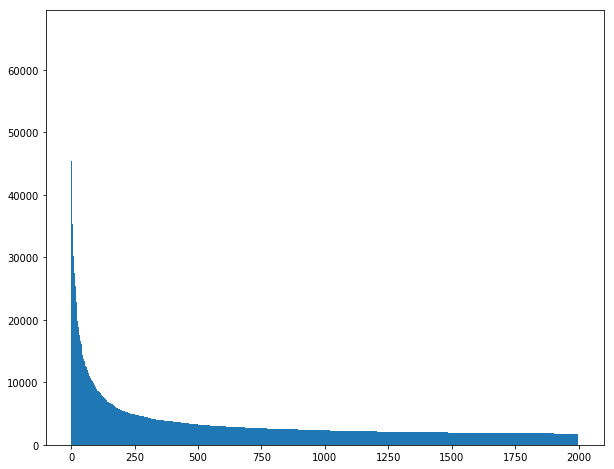

In [62]:
fig = plt.figure(figsize=figsize)
labels, values = zip(*count_topics.most_common(1999))
indexes = np.arange(len(labels))

plt.bar(indexes, values, width=1)

In [63]:
question_topic_num = [len(topics.split(',')) if topics else 0 for topics in questions.topics ]

In [66]:
_cqt = Counter(question_topic_num)
print(_cqt.most_common(10))

[(1, 999984), (2, 770310), (3, 638821), (4, 396903), (5, 189585), (6, 2300), (7, 1092), (8, 526), (9, 218), (10, 107)]


In [70]:
for i in range(len(question_topic_num)+1):
    if question_topic_num[i] > 8:
        print(i)
        break

2788


In [72]:
questions.iloc[2788].topics

'3414266676439227853,-5295045465633304607,-2755271738371556635,3894468979819174909,4113529672303259565,-2410784981474048482,-6916771625541437162,-1287901756552786603,4047468682330031577,279996543863601173,8064131816828727404,-8963554618409314978,-7261194805221226386'

In [73]:
def split_topics(topics):
    topics = topics.split(',')
    result = []
    for t in topics:
        if t not in result:
            result.append(t)
        if len(result) >= 5:
            break
    return result

In [75]:
%%time
questions['_topics'] = questions.topics.apply(split_topics)

CPU times: user 15.6 s, sys: 52.2 s, total: 1min 7s
Wall time: 1min 31s


In [78]:
print(questions.iloc[2788].topics)
print(questions.iloc[2788]._topics)

3414266676439227853,-5295045465633304607,-2755271738371556635,3894468979819174909,4113529672303259565,-2410784981474048482,-6916771625541437162,-1287901756552786603,4047468682330031577,279996543863601173,8064131816828727404,-8963554618409314978,-7261194805221226386
['3414266676439227853', '-5295045465633304607', '-2755271738371556635', '3894468979819174909', '4113529672303259565']


In [79]:
questions['topics'] = questions['_topics']
del questions['_topics']

In [80]:
questions.iloc[0]

id                                           6555699376639805223
title          w305,w13549,w22752,w11,w7225,w2565,w1106,w16,w...
description    w231,w54,w1681,w54,w11506,w5714,w7,w54,w744,w1...
topics                [7739004195693774975, 3738968195649774859]
Name: 0, dtype: object

In [86]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [83]:
%%time
mb = MultiLabelBinarizer()
y_train = mb.fit_transform(questions.topics)

CPU times: user 9.89 s, sys: 12.1 s, total: 22 s
Wall time: 28.7 s


In [84]:
y_train.shape

(2999967, 1999)

In [ ]:
%%time
clf = OneVsRestClassifier(LogisticRegression(), n_jobs=-1)
clf.fit(train_input,y_train)